# What sells a car?

## Brief

**Project goal**: we need to study data of hundreds of free advertisements for vehicles published on the site and collected over the last few years and determine which factors influence the price of a car.

**Description of the data**

The dataset contains the following fields:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

**Step 1. Study data** 

- Open the data file
- Study the general information

**Step 2. Data preprocessing** 

- Identify and study missing values
- Fill in missing values
- Describe the factors that may have resulted in missing values
- Indicate the columns where the data types need to be changed
- Convert the data to the required types

**Step 3. Enrich data** 

Calculate and add to the table the following:

- Day of the week, month, and year the ad was placed
- The vehicle's age (in years) when the ad was placed
- The vehicle's average mileage per year
- In the `condition` column, replace string values with a numeric scale

**Step 4. Carry out exploratory data analysis** 

- Study the price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- Plot histograms for each of the parameters
- Study how outliers affect the form and readability of the histograms
- Determine the upper limits of outliers
- Remove the outliers and store them in a separate DataFrame
- Use the filtered data to plot new histograms and draw conclusions
- Study how many days advertisements were displayed
- Analyze the number of ads and the average price for each type of vehicle
- Analyze what factors impact the price most

**Step 5. Conclusion** 

- Write an overall conclusion

## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
# Load the data file into a DataFrame

data = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [3]:
# Let's see how many rows and columns our dataset has

data.shape

(51525, 13)

In [4]:
# let's print the first 15 rows

data.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [5]:
# Get info on data

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


We have missing values in five columns: `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd`.

In [6]:
#Count the percentage of missing values

percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'columns': list(data.columns),
                                   'percent_missing': list(percent_missing)})
print(missing_value_data)

         columns  percent_missing
0          price         0.000000
1     model_year         7.023775
2          model         0.000000
3      condition         0.000000
4      cylinders        10.208637
5           fuel         0.000000
6       odometer        15.316836
7   transmission         0.000000
8           type         0.000000
9    paint_color        17.985444
10        is_4wd        50.369723
11   date_posted         0.000000
12   days_listed         0.000000


`paint_color` and `is_4wd` columns contain the most missing values.

In [7]:
# Getting the info about data types

data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

There are inappropriate data types in some columns. `model_year` and `cylinders` are float64 but need to be int64. `date_posted` is an object but needs to be DateTime.

In [8]:
# Unique values of 'model'

data['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

We can see that the same models of vehicles are written in different formats. For example, 'ford f250 super duty' and 'ford f-250 super duty'.

In [9]:
# Unique values of 'is_4wd '

data['is_4wd'].unique()

array([ 1., nan])

`is_4wd` - the boolean field that contains only 'True' values (1). It's reasonable to assume that the missing values are False (0).

### Conclusions and further steps

Columns `price`, `model`, `condition`, `transmission`, `fuel`, `type` and `days_listed` look normal, but part of the data should be treated to make it more suitable for the required analysis.

- `model_year` and `cylinders` have inappropriate data types. We need to convert them to int64.
- `date_posted` has an object data type. We will convert it to DateTime.
-  In `model` the same models of vehicles are written in different formats. We will fix it.
- `is_4wd` - the boolean field that contains only 'True' values (1). We will replace missing values with 0s.
-  We also will work with missing values in `model_year`, `cylinders`, `odometer`, and `paint_color` columns. We will try to understand if any factors have resulted in missing values. Then we will choose how to fill in the missing values.

## Treat missing values (if any)

In [10]:
# Let's see how much missing values we have in dataset

data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [11]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.

data[(data['model_year'].isnull()) 
     & (data['cylinders'].isnull()) 
     & (data['odometer'].isnull()) 
     & (data['paint_color'].isnull())].shape[0]

9

Missing values intersect in a few rows, so it can mean that missing values in the dataset are not symmetric.

Missing values in `model_year`

In [12]:
# Let's look at the filtered table with missing values in 'model_year'

data[data['model_year'].isnull()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
84,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,NaN,2018-09-15,1
102,10800,NaN,chevrolet colorado,excellent,5.0,gas,114922.0,automatic,truck,red,1.0,2018-06-23,35
114,23700,NaN,nissan frontier crew cab sv,good,6.0,gas,12901.0,other,pickup,black,1.0,2018-09-21,8
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
144,8995,NaN,chevrolet silverado 1500,excellent,8.0,gas,119726.0,automatic,truck,grey,1.0,2019-03-18,27


We can assume that the missing data in this column is related to other parameters, such as the condition of the vehicle, type of transmission, or type of vehicle. So let's see if other factors influenced the missing data.

In [13]:
# Checking distribution of missing values by condition

data[data['model_year'].isnull()]['condition'].value_counts() / data[data['model_year'].isnull()].shape[0]

excellent    0.469467
good         0.400663
like new     0.092014
fair         0.031777
salvage      0.003316
new          0.002763
Name: condition, dtype: float64

In [14]:
# Checking the distribution in the whole dataset

data['condition'].value_counts() / data['condition'].shape[0]

excellent    0.480796
good         0.390975
like new     0.092033
fair         0.031189
new          0.002775
salvage      0.002232
Name: condition, dtype: float64

`condition` distribution of the whole dataset is the same as the `condition` distribution of the missing values. So we can say that there is no connection between missing values in `model_year` and `condition`.

In [15]:
# Checking distribution of missing values by transmission

data[data['model_year'].isnull()]['transmission'].value_counts() / data[data['model_year'].isnull()].shape[0]

automatic    0.914617
manual       0.051672
other        0.033711
Name: transmission, dtype: float64

In [16]:
# Checking the distribution in the whole dataset

data['transmission'].value_counts() / data['transmission'].shape[0]

automatic    0.910277
manual       0.054905
other        0.034818
Name: transmission, dtype: float64

`transmission` distribution of the whole dataset is the same as the `transmission` distribution of the missing values. So we can say that there is no connection between missing values in `model_year` and `transmission`.

In [17]:
# Checking distribution of missing values by type

data[data['model_year'].isnull()]['type'].value_counts() / data[data['model_year'].isnull()].shape[0]

SUV            0.253938
sedan          0.234319
truck          0.231003
pickup         0.139265
coupe          0.040066
wagon          0.030395
mini-van       0.023763
hatchback      0.020171
van            0.010776
convertible    0.007461
other          0.006079
offroad        0.002763
Name: type, dtype: float64

In [18]:
# Checking the distribution in the whole dataset

data['type'].value_counts() / data['type'].shape[0]

SUV            0.240757
truck          0.239748
sedan          0.235885
pickup         0.135623
coupe          0.044697
wagon          0.029908
mini-van       0.022533
hatchback      0.020320
van            0.012285
convertible    0.008656
other          0.004968
offroad        0.004153
bus            0.000466
Name: type, dtype: float64

`type` distribution of the whole dataset is the same as the `type` distribution of the missing values. So we can say that there is no connection between missing values in `model_year` and `type`. 

There is no particular connection between `model_year` and other car parameters. So probably values are missing randomly. Most likely, the missing data in 'model_year' is just a technical error. They can be replaced by an average `model_year` by the condition of the car.

In [19]:
# Look at the mean values for 'model_year' based on condition

data.groupby('condition')['model_year'].mean().apply(round)

condition
excellent    2011
fair         2002
good         2009
like new     2012
new          2014
salvage      2006
Name: model_year, dtype: int64

In [20]:
# Function that we will use for filling in missing values

data['model_year'] = data.groupby('condition')['model_year']\
                        .transform(lambda grp: grp.fillna(np.mean(grp))).apply(round)

In [21]:
# Let's chack that missing values were filled

data['model_year'].isnull().sum()

0

Missing values in `cylinders`

In [22]:
# Let's look at the filtered table with missing values in 'cylinders'

data[data['cylinders'].isnull()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
72,3650,2011,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
75,6950,2005,chevrolet tahoe,excellent,NaN,gas,186021.0,automatic,SUV,NaN,1.0,2018-10-30,3
87,8499,2009,bmw x5,good,NaN,gas,104482.0,automatic,SUV,blue,1.0,2019-03-04,52
119,14800,2016,kia sorento,like new,NaN,gas,NaN,automatic,SUV,brown,NaN,2019-02-27,93
126,25900,2012,chevrolet silverado 1500 crew,good,NaN,other,NaN,other,pickup,NaN,1.0,2018-08-31,44


In [23]:
data['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

We can assume that the missing data in this column is related to other parameters, such as type of fuel, the condition of the vehicle, type of transmission, or type of vehicle. Let's see if other factors influenced the missing data.

In [24]:
# Checking distribution of missing values by fuel

data[data['cylinders'].isnull()]['fuel'].value_counts() / data[data['cylinders'].isnull()].shape[0]

gas         0.917490
diesel      0.071863
hybrid      0.007414
other       0.002852
electric    0.000380
Name: fuel, dtype: float64

In [25]:
# Checking the distribution in the whole dataset

data['fuel'].value_counts() / data['fuel'].shape[0]

gas         0.917768
diesel      0.072082
hybrid      0.007938
other       0.002096
electric    0.000116
Name: fuel, dtype: float64

`fuel` distribution of the whole dataset is the same as the `fuel` distribution of the missing values. So we can say that there is no connection between missing values in `cylinders` and `fuel`. 

In [26]:
# Checking distribution of missing values by transmission

data[data['cylinders'].isnull()]['transmission'].value_counts() / data[data['cylinders'].isnull()].shape[0]

automatic    0.909125
manual       0.058175
other        0.032700
Name: transmission, dtype: float64

In [27]:
# Checking the distribution in the whole dataset

data['fuel'].value_counts() / data['fuel'].shape[0]

gas         0.917768
diesel      0.072082
hybrid      0.007938
other       0.002096
electric    0.000116
Name: fuel, dtype: float64

`transmission` distribution of the whole dataset is the same as the `transmission` distribution of the missing values. So we can say that there is no connection between missing values in `cylinders` and `transmission`. 

In [28]:
# Checking distribution of missing values by type

data[data['cylinders'].isnull()]['type'].value_counts() / data[data['cylinders'].isnull()].shape[0]

truck          0.240494
sedan          0.238783
SUV            0.232700
pickup         0.135741
coupe          0.042205
wagon          0.031179
hatchback      0.024715
mini-van       0.024144
van            0.012357
convertible    0.006844
other          0.005894
offroad        0.004183
bus            0.000760
Name: type, dtype: float64

In [29]:
# Checking the distribution in the whole dataset

data['type'].value_counts() / data['type'].shape[0]

SUV            0.240757
truck          0.239748
sedan          0.235885
pickup         0.135623
coupe          0.044697
wagon          0.029908
mini-van       0.022533
hatchback      0.020320
van            0.012285
convertible    0.008656
other          0.004968
offroad        0.004153
bus            0.000466
Name: type, dtype: float64

`type` distribution of the whole dataset is the same as the `type` distribution of the missing values. So we can say that there is no connection between missing values in `cylinders` and `type`. 

There is no special connection between `cylinders` and other parameters of the car. So probably values are missing randomly. Most likely the missing data in `cylinders` is just a technical error. They can be replaced by an average `cylinders` by type of the car.

In [30]:
# Look at the mean values for cylinders based on type

data.groupby('type')['cylinders'].mean().apply(round)

type
SUV            6
bus            9
convertible    7
coupe          6
hatchback      4
mini-van       6
offroad        6
other          6
pickup         7
sedan          5
truck          7
van            6
wagon          5
Name: cylinders, dtype: int64

In [31]:
# Function that we will use for filling in missing values

data['cylinders'] = data.groupby('type')['cylinders']\
                        .transform(lambda grp: grp.fillna(np.mean(grp))).apply(round)

In [32]:
# Let's chack that missing values were filled

data['cylinders'].isnull().sum()

0

Missing values in `odometer`

In [33]:
# Let's look at the filtered table with missing values in 'odometer'

data[data['odometer'].isnull()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003,ford f-150,fair,8,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013,ram 1500,excellent,8,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004,jeep wrangler,good,6,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009,chrysler 200,excellent,4,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017,chevrolet malibu,like new,4,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
29,5495,2010,chevrolet impala,excellent,6,gas,NaN,automatic,sedan,white,NaN,2019-02-18,20
38,7999,2015,chrysler 200,good,4,gas,NaN,automatic,sedan,NaN,NaN,2019-03-08,29
41,11995,2017,nissan rogue,like new,4,gas,NaN,automatic,SUV,silver,1.0,2018-09-20,21
42,34900,2013,mercedes-benz benze sprinter 2500,excellent,6,diesel,NaN,automatic,van,black,NaN,2019-01-15,16
56,4200,2006,jeep grand cherokee,excellent,6,gas,NaN,automatic,SUV,white,1.0,2018-07-01,79


We can assume that missing values in this column are related to other parameters, such as the type of fuel, the condition of the vehicle, or the type of vehicle. Let's see if other factors influenced the missing data.

In [34]:
# Checking distribution of missing values by condition

data[data['odometer'].isnull()]['condition'].value_counts() / data[data['odometer'].isnull()].shape[0]

excellent    0.481500
good         0.391789
like new     0.092245
fair         0.030030
new          0.002281
salvage      0.002154
Name: condition, dtype: float64

In [35]:
# Checking the distribution in the whole dataset

data['condition'].value_counts() / data['condition'].shape[0]

excellent    0.480796
good         0.390975
like new     0.092033
fair         0.031189
new          0.002775
salvage      0.002232
Name: condition, dtype: float64

There is no connection between missing values in `odometer` and `condition`.

In [36]:
# Checking distribution of missing values by fuel 

data[data['odometer'].isnull()]['fuel'].value_counts() / data[data['odometer'].isnull()].shape[0]

gas         0.912316
diesel      0.077293
hybrid      0.007349
other       0.002914
electric    0.000127
Name: fuel, dtype: float64

In [37]:
# Checking the distribution in the whole dataset

data['fuel'].value_counts() / data['fuel'].shape[0]

gas         0.917768
diesel      0.072082
hybrid      0.007938
other       0.002096
electric    0.000116
Name: fuel, dtype: float64

There is no connection between missing values in `odometer` and `fuel`.

In [38]:
# Checking distribution of missing values by type 

data[data['odometer'].isnull()]['type'].value_counts() / data[data['odometer'].isnull()].shape[0]

sedan          0.240877
SUV            0.239990
truck          0.235555
pickup         0.138495
coupe          0.043082
wagon          0.029650
mini-van       0.021034
hatchback      0.017613
van            0.017486
convertible    0.008490
other          0.004181
offroad        0.003421
bus            0.000127
Name: type, dtype: float64

In [39]:
# Checking the distribution in the whole dataset

data['type'].value_counts() / data['type'].shape[0]

SUV            0.240757
truck          0.239748
sedan          0.235885
pickup         0.135623
coupe          0.044697
wagon          0.029908
mini-van       0.022533
hatchback      0.020320
van            0.012285
convertible    0.008656
other          0.004968
offroad        0.004153
bus            0.000466
Name: type, dtype: float64

There is no connection between missing values in `odometer` and `type`.

There is no special connection between `odometer` and other parameters of the car. So probably values are missing randomly. Most likely the missing data in `odometer` is just a technical error. They can be replaced by an average `odometer` by condition of the car.

In [40]:
# Look at the mean values for odometer based on condition

data.groupby('condition')['odometer'].mean().apply(round)

condition
excellent    106688
fair         183062
good         129920
like new      79427
new           43476
salvage      140920
Name: odometer, dtype: int64

In [41]:
# Function that we will use for filling in missing values

data['odometer'] = data.groupby('condition')['odometer']\
                        .transform(lambda grp: grp.fillna(np.mean(grp))).apply(round)
data['odometer'].isnull().sum()

0

Missing values in `paint_color`

In [42]:
# Let's look at the filtered table with missing values in 'paint_color'

data[data['paint_color'].isnull()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003,ford f-150,fair,8,gas,183062,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012,ram 1500,excellent,8,gas,140742,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007,toyota rav4,good,6,gas,154000,automatic,SUV,NaN,NaN,2018-08-22,8
25,11499,2017,chevrolet malibu,like new,4,gas,79427,automatic,sedan,NaN,NaN,2018-07-26,43
31,11999,2017,toyota camry le,excellent,4,gas,35721,automatic,sedan,NaN,NaN,2018-09-13,25
34,9500,2008,toyota highlander,good,6,gas,149799,automatic,SUV,NaN,NaN,2018-06-04,121
35,14999,2015,dodge charger,good,6,gas,63037,automatic,sedan,NaN,NaN,2018-05-11,37
36,10499,2013,chrysler 300,good,5,gas,88042,automatic,sedan,NaN,NaN,2018-05-05,22


It isn't easy to guess what factors can influence the car's color. Therefore, it is not logical to replace missing data in `paint_color` according to the type or condition of the car. Based on this, we will fill the missing data with the value "unidentified".

In [43]:
# Fill the missing values

data['paint_color'].fillna(value='unidentified', inplace=True)

data['paint_color'].isnull().sum()

0

Missing values in `is_4wd`

Most likely, 1 means the presence of 4wd in the car, and 0, respectively, its absence. We know that most often, 4wdis are present in jeeps and not in sedans. To determine if the missing data should be 0, we can check how the missing data in the `is_4wd` column usually occurs in rows where the vehicle type is the sedan. And vice versa, how often we can see "1" in the type of transport like trucks and SUVs.

In [44]:
# Checking the distribution in the whole dataset

data['type'].value_counts() / data['type'].shape[0]

SUV            0.240757
truck          0.239748
sedan          0.235885
pickup         0.135623
coupe          0.044697
wagon          0.029908
mini-van       0.022533
hatchback      0.020320
van            0.012285
convertible    0.008656
other          0.004968
offroad        0.004153
bus            0.000466
Name: type, dtype: float64

In [45]:
# Checking distribution of missing values by condition 

data[data['is_4wd'].isnull()]['type'].value_counts() / data[data['is_4wd'].isnull()].shape[0]

sedan          0.446615
SUV            0.136863
truck          0.115439
coupe          0.085809
pickup         0.075598
mini-van       0.043232
hatchback      0.034177
van            0.022849
wagon          0.018033
convertible    0.015143
other          0.005009
bus            0.000925
offroad        0.000308
Name: type, dtype: float64

In [46]:
# Checking distribution of '1' values by condition

data[data['is_4wd'] == 1]['type'].value_counts()

truck          9357
SUV            8853
pickup         5026
wagon          1073
sedan           563
offroad         206
hatchback       160
other           126
coupe            76
convertible      53
van              40
mini-van         39
Name: type, dtype: int64

So it is, mostly missing data is found in sedans, which usually do not have 4wd. So we can fill all the missing data in the column with 0.

In [47]:
# Fill missing values in 'is_4wd'

data['is_4wd'].unique()

array([ 1., nan])

In [48]:
data['is_4wd'].fillna(0, inplace=True)

In [49]:
data['is_4wd'].unique()

array([1., 0.])

In [50]:
data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [51]:
# Check that we filled all the missing values

data['is_4wd'].isnull().sum()

0

## Fix data types

There are inappropriate data types in some columns. `model_year` and `cylinders` are float64, but need to be int64. `date_posted` is object, but need to be datetime.

In [52]:
# Check data types

data.dtypes

price             int64
model_year        int64
model            object
condition        object
cylinders         int64
fuel             object
odometer          int64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [53]:
# Fix data type in 'date_posted'

data['date_posted'] = pd.to_datetime(data['date_posted'])

In [54]:
# Fix data type in 'model_year'

data['model_year'] = data['model_year'].astype(int)

In [55]:
# Fix data type in 'cylinders'

data['cylinders'] = data['cylinders'].astype(int)

In [56]:
# Check that all data types are fixed

data.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer                 int64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

Also we need to replace extra values in 'model'.

In [57]:
# Let's replace extra values in 'model'

data['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [58]:
data["model"].replace({"ford f-250 sd": "ford f-250", 
                       "ford f250 super duty": "ford f-250", 
                       "ford f350": "ford f-350", 
                       "ford f150": "ford f-150", 
                       "ford f-350 sd": "ford f-350", 
                       "ford f350 super duty": "ford f-350", 
                       "ford fusion se": "ford fusion", 
                       "ford focus se": "ford focus", 
                       "ford f250": "ford f-250", 
                       "ford f-350 sd": "ford f-350", 
                       "ford f350 super duty": "ford f-350", 
                       "ford fusion se": "ford fusion", 
                       "ford focus se": "ford focus", 
                       "ford f-250 super duty": "ford f-250", 
                       "ford f250": "ford f-250",
                       "chevrolet silverado 1500 crew": "chevrolet silverado",
                       "chevrolet silverado 3500hd": "chevrolet silverado",
                       "chevrolet silverado 2500hd": "chevrolet silverado",
                       "ford f150 supercrew cab xlt": "ford f-150",
                       "gmc sierra 2500hd": "gmc sierra",
                       "ford f-350 super duty": "ford f-350",
                       "ford mustang gt coupe 2d": "ford mustang",
                       "honda civic lx": "honda civic",
                       "gmc sierra 1500": "gmc sierra",
                       "chevrolet camaro lt coupe 2d": "chevrolet camaro",
                       "chevrolet silverado 1500": "chevrolet silverado",
                       "jeep grand cherokee laredo": "jeep grand cherokee",
                       "nissan frontier crew cab sv": "nissan frontier",
                       "jeep wrangler unlimited": "jeep wrangler",
                       "toyota camry le": "toyota camry",}
                    , inplace=True)
data["model"].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado', 'honda accord', 'ram 1500', 'gmc yukon',
       'jeep cherokee', 'chevrolet traverse', 'hyundai elantra',
       'chevrolet tahoe', 'toyota rav4', 'jeep wrangler',
       'chevrolet malibu', 'ford fusion', 'chevrolet impala',
       'chevrolet corvette', 'jeep liberty', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'chevrolet camaro', 'chevrolet cruze', 'ford mustang',
       'nissan frontier', 'subaru impreza', 'nissan versa', 'ford f-250',
       'subaru forester', 'ford explorer', 'ford f-350', 'ford edge',
       'nissan maxima', 'nissan sentra', '

## Enrich data

Let's add additional factors to the data to make the analysis easier.

In [59]:
# Add datetime values for when the ad was placed

data['date_posted']

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]

In [60]:
# Let's see an example of datetime value

ex=data['date_posted'].loc[1]
ex

Timestamp('2018-10-19 00:00:00')

In [61]:
type(ex)

pandas._libs.tslibs.timestamps.Timestamp

In [62]:
pd.to_datetime(ex)

Timestamp('2018-10-19 00:00:00')

In [63]:
pd.to_datetime(ex).month

10

In [64]:
# Extract months from 'date_posted'

data['month_posted']=pd.to_datetime(data['date_posted']).dt.month
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unidentified,1.0,2018-06-23,19,6
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,10
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2
3,1500,2003,ford f-150,fair,8,gas,183062,automatic,pickup,unidentified,0.0,2019-03-22,9,3
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,4


In [65]:
# Extract week days from 'date_posted'

data['weekday_posted'] = pd.to_datetime(data['date_posted']).dt.weekday
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month_posted,weekday_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unidentified,1.0,2018-06-23,19,6,5
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,10,4
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2,3
3,1500,2003,ford f-150,fair,8,gas,183062,automatic,pickup,unidentified,0.0,2019-03-22,9,3,4
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,4,1


In [66]:
# Extract years from 'date_posted'

data['year_posted'] = pd.to_datetime(data['date_posted']).dt.year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month_posted,weekday_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unidentified,1.0,2018-06-23,19,6,5,2018
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,10,4,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2,3,2019
3,1500,2003,ford f-150,fair,8,gas,183062,automatic,pickup,unidentified,0.0,2019-03-22,9,3,4,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,4,1,2019


In [67]:
# Add the vehicle's age when the ad was placed

data['vehicle_age'] = data['year_posted'] - data['model_year']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month_posted,weekday_posted,year_posted,vehicle_age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unidentified,1.0,2018-06-23,19,6,5,2018,7
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,10,4,2018,9
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2,3,2019,6
3,1500,2003,ford f-150,fair,8,gas,183062,automatic,pickup,unidentified,0.0,2019-03-22,9,3,4,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,4,1,2019,2


In [68]:
# Add the vehicle's average mileage per year

data['mileage_per_year'] = data['odometer'] / data['vehicle_age'] 

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month_posted,weekday_posted,year_posted,vehicle_age,mileage_per_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unidentified,1.0,2018-06-23,19,6,5,2018,7,20714.285714
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,10,4,2018,9,9856.111111
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2,3,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,183062,automatic,pickup,unidentified,0.0,2019-03-22,9,3,4,2019,16,11441.375000
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,4,1,2019,2,40451.500000


In [69]:
data[data['mileage_per_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month_posted,weekday_posted,year_posted,vehicle_age,mileage_per_year
17037,45400,2018,ram 3500,excellent,6,diesel,0,automatic,pickup,black,1.0,2018-12-16,18,12,6,2018,0,NaN
40489,15900,2018,toyota prius,excellent,4,hybrid,0,automatic,hatchback,blue,0.0,2018-07-30,31,7,0,2018,0,NaN


In [70]:
data['mileage_per_year'] = data['mileage_per_year'].fillna(0)
data['mileage_per_year'].isnull().sum()

0

Let's replace the condition values with numbers for more easily data manipulations.

- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [71]:
# Create a new column with numbers indicating the condition of the car

data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [72]:
condition_dict={
    'new':5,
    'like new':4,
    'excellent':3,
    'good':2,
    'fair':1,
    'salvage':0
}

In [73]:
condition_dict.keys()

dict_keys(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'])

In [74]:
condition_dict.values()

dict_values([5, 4, 3, 2, 1, 0])

In [75]:
condition_dict['good']

2

In [76]:
data['condition_category']=data['condition'].apply(lambda x: condition_dict.get(x))
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month_posted,weekday_posted,year_posted,vehicle_age,mileage_per_year,condition_category
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unidentified,1.0,2018-06-23,19,6,5,2018,7,20714.285714,2
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,10,4,2018,9,9856.111111,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2,3,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,183062,automatic,pickup,unidentified,0.0,2019-03-22,9,3,4,2019,16,11441.375000,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,4,1,2019,2,40451.500000,3


## Check clean data

Given the data is ready for the analysis, let's take just another quick look at it.

In [77]:
# print the general/summary information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          51525 non-null  int64         
 2   model               51525 non-null  object        
 3   condition           51525 non-null  object        
 4   cylinders           51525 non-null  int64         
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  int64         
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         51525 non-null  object        
 10  is_4wd              51525 non-null  float64       
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  month_posted        51525 non-null  int64     

In [78]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,month_posted,weekday_posted,year_posted,vehicle_age,mileage_per_year,condition_category
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,5.152500e+04,51525.000000
mean,12132.464920,2009.767744,6.119185,115545.036274,0.496303,39.55476,6.628491,3.005434,2018.307462,8.539719,inf,2.637535
std,10040.803015,6.077252,1.597716,60397.746357,0.499991,28.20427,3.474134,1.997759,0.461447,6.091266,NaN,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,1.000000,0.000000,2018.000000,0.000000,0.000000e+00,0.000000
25%,5000.000000,2007.000000,4.000000,79009.000000,0.000000,19.00000,3.000000,1.000000,2018.000000,4.000000,1.066880e+04,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,0.000000,33.00000,7.000000,3.000000,2018.000000,8.000000,1.524114e+04,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,1.000000,53.00000,10.000000,5.000000,2019.000000,12.000000,2.258333e+04,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,12.000000,6.000000,2019.000000,110.000000,inf,5.000000


In [79]:
# print a sample of data

data.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,month_posted,weekday_posted,year_posted,vehicle_age,mileage_per_year,condition_category
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unidentified,1.0,2018-06-23,19,6,5,2018,7,20714.285714,2
1,25500,2009,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,10,4,2018,9,9856.111111,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2,3,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,183062,automatic,pickup,unidentified,0.0,2019-03-22,9,3,4,2019,16,11441.375000,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,4,1,2019,2,40451.500000,3
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1.0,2018-06-20,15,6,2,2018,4,14488.500000,3
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0.0,2018-12-27,73,12,3,2018,3,26404.000000,3
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1.0,2019-01-07,68,1,0,2019,6,18245.500000,3
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unidentified,1.0,2018-07-16,19,7,0,2018,6,17362.333333,3
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,1.0,2019-02-15,17,2,4,2019,11,13381.000000,3


<font color='#32cd32'><b><u> Reviewer Comment. v.1 </u></b></font>

<div class="alert alert-success" >
    
**Success:** Good, now we can analyze our data. You've made an outstanding job here!
</div>

<font color='#ffa500'><b><u> Reviewer Comment. v. 1 </u></b></font>

<div class="alert alert-warning" >
    
**Remark:**
It'd be better to describe briefly, what missing values were observed, how we've preprocessed them, and also mention about new columns.

</div> 



## Study core parameters

Let's study the parameters listed below and see how outliers affect the form and readability of the histograms.

The parameters are

- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

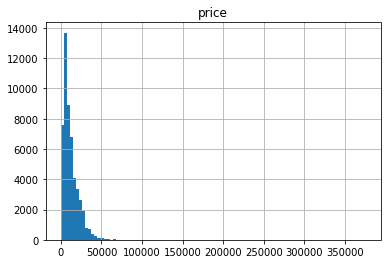

In [80]:
#Price

data.hist('price', bins=100)

array([[<AxesSubplot:title={'center':'vehicle_age'}>]], dtype=object)

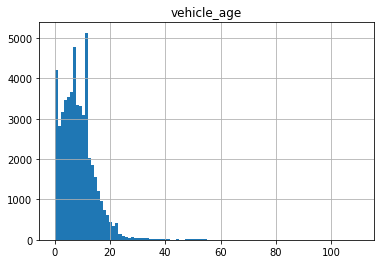

In [81]:
# vehicle_age

data.hist('vehicle_age', bins=100)

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

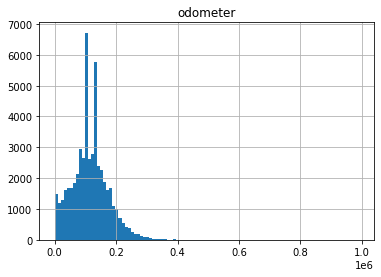

In [82]:
# odometer

data.hist('odometer', bins=100)

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

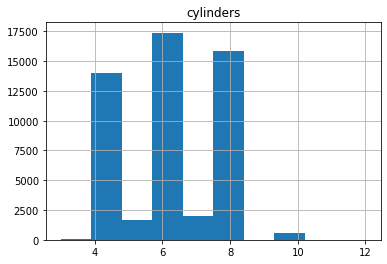

In [83]:
# cylinders

data.hist('cylinders')

array([[<AxesSubplot:title={'center':'condition_category'}>]],
      dtype=object)

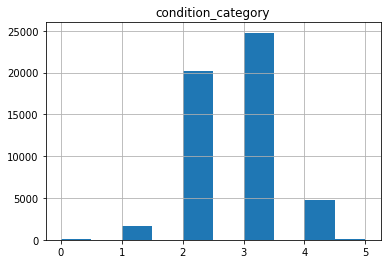

In [84]:
# condition

data.hist('condition_category')

We can see that columns `price`, `vehicle_age`, and `odometer` contain outliers. This makes it difficult to study the big part of the data when visualized in histograms.

## Study and treat outliers

Let's determine what columns may contain outliers, and create a DataFrame without those outliers.

In [85]:
# Create a function for outliers

def distribution_percentile(parameter):
    print('The histogram of: {}'.format(parameter))
    data[parameter].hist(bins=100)
    plt.show()
    if data[parameter].mean()>data[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print('---------------------------------------')
    print('Statistics on: {}'.format(parameter))
    print(data[parameter].describe())
    ninety_nine = np.percentile(data[parameter], 99)
    one = np.percentile(data[parameter], 1)
    print('---------------------------------------')
    print('min border:',one)
    print('max border:',ninety_nine)
    print('---------------------------------------')
    print('The outliers are considered to be values below',one, "and above",ninety_nine)
    print('We have',len(data[(data[parameter]<one)|(data[parameter]>ninety_nine)]),"values that we can consider outliers")

The histogram of: price


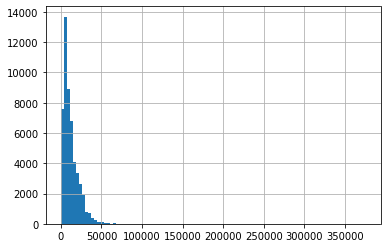

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 1.0
max border: 43995.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 43995.0
We have 515 values that we can consider outliers


In [86]:
# Let's see outliers of price

distribution_percentile('price')

The histogram of: price


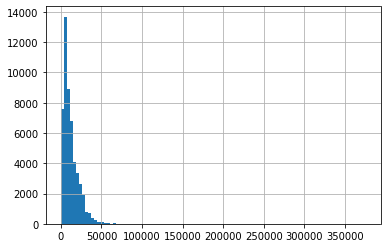

The distribution is skewed to the right
---------------------------------------
Statistics on: price
count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
---------------------------------------
min border: 1.0
max border: 43995.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 43995.0
We have 515 values that we can consider outliers
The histogram of: vehicle_age


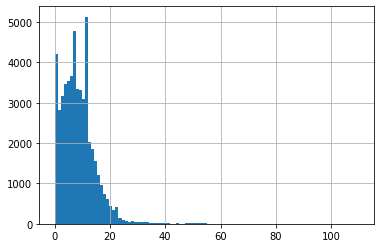

The distribution is skewed to the right
---------------------------------------
Statistics on: vehicle_age
count    51525.000000
mean         8.539719
std          6.091266
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64
---------------------------------------
min border: 0.0
max border: 27.0
---------------------------------------
The outliers are considered to be values below 0.0 and above 27.0
We have 512 values that we can consider outliers
The histogram of: odometer


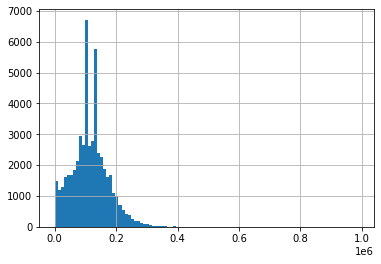

The distribution is skewed to the right
---------------------------------------
Statistics on: odometer
count     51525.000000
mean     115545.036274
std       60397.746357
min           0.000000
25%       79009.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64
---------------------------------------
min border: 137.0
max border: 280000.0
---------------------------------------
The outliers are considered to be values below 137.0 and above 280000.0
We have 1025 values that we can consider outliers
The histogram of: cylinders


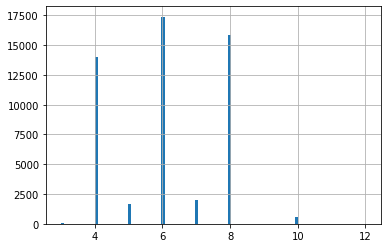

The distribution is skewed to the right
---------------------------------------
Statistics on: cylinders
count    51525.000000
mean         6.119185
std          1.597716
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
---------------------------------------
min border: 4.0
max border: 10.0
---------------------------------------
The outliers are considered to be values below 4.0 and above 10.0
We have 36 values that we can consider outliers
The histogram of: condition_category


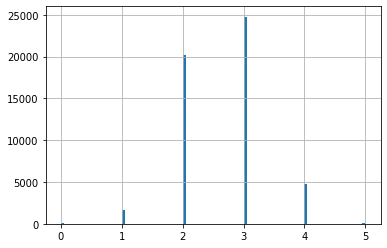

The distribution is skewed to the left
---------------------------------------
Statistics on: condition_category
count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition_category, dtype: float64
---------------------------------------
min border: 1.0
max border: 4.0
---------------------------------------
The outliers are considered to be values below 1.0 and above 4.0
We have 258 values that we can consider outliers


In [87]:
# Apply function for all the parameters

for parameter in ['price','vehicle_age','odometer','cylinders', 'condition_category']:
    distribution_percentile(parameter)

In [88]:
# Create a table of borders for all the parameters

border_list=[]
for parameter in ['price','vehicle_age','odometer','cylinders', 'condition_category']:
    ninety_nine = np.percentile(data[parameter], 99)
    one = np.percentile(data[parameter], 1)
    border_list.append([parameter,one,ninety_nine])

In [89]:
border_list

[['price', 1.0, 43995.0],
 ['vehicle_age', 0.0, 27.0],
 ['odometer', 137.0, 280000.0],
 ['cylinders', 4.0, 10.0],
 ['condition_category', 1.0, 4.0]]

In [90]:
border_data=pd.DataFrame(border_list,columns=['column','min_border','max_border'])
border_data

,column,min_border,max_border
0,price,1.0,43995.0
1,vehicle_age,0.0,27.0
2,odometer,137.0,280000.0
3,cylinders,4.0,10.0
4,condition_category,1.0,4.0


In [91]:
# Store data without outliers in a separate DataFrame

data_clean=data.copy()

In [92]:
for parameter in ['price','vehicle_age','odometer', 'cylinders', 'condition_category']:
    ninety_nine = np.percentile(data_clean[parameter], 99)
    one = np.percentile(data_clean[parameter], 1)
    data_clean=data_clean[(data_clean[parameter]>=one)&(data_clean[parameter]<=ninety_nine)]

In [93]:
# Let's compare data with outliers and data without outliers

data.shape

(51525, 19)

In [94]:
data_clean.shape

(49286, 19)

In [95]:
data_clean['condition_category'].value_counts()

3    23977
2    19402
4     4475
1     1432
Name: condition_category, dtype: int64

We can see that the number of rows has been reduced from 49286 to 41304.

## Study core parameters without outliers

Let's compare histograms of core parameters with outliers and without outliers
    

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

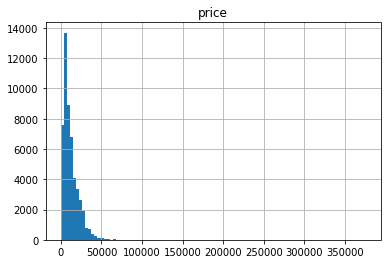

In [96]:
# 'price' with outliers

data.hist('price', bins=100)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

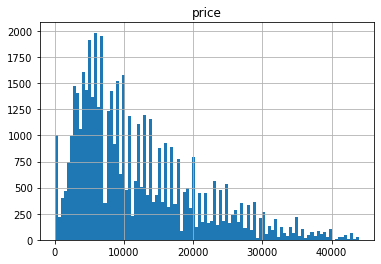

In [97]:
# 'price' without outliers

data_clean.hist('price', bins=100)

As we can see, after removing outliers, the graph became more readable and we can see distribution more accurate. 


array([[<AxesSubplot:title={'center':'vehicle_age'}>]], dtype=object)

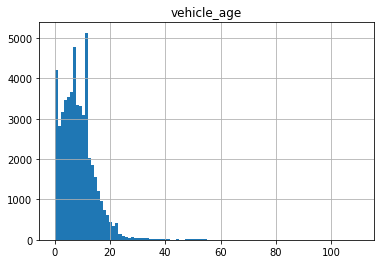

In [98]:
# 'vehicle_age' with outliers

data.hist('vehicle_age', bins=100)

array([[<AxesSubplot:title={'center':'vehicle_age'}>]], dtype=object)

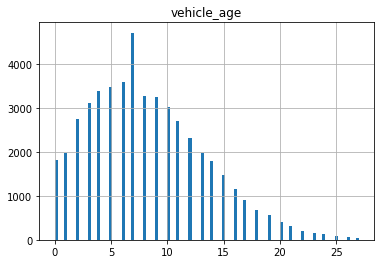

In [99]:
# 'vehicle_age' without outliers

data_clean.hist('vehicle_age', bins=100)

With the change of scale (after removing extreme values), we may now see, that the biggest number of vehicles is distributed around 4 to 10 years, with a spike in ~6 years.

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

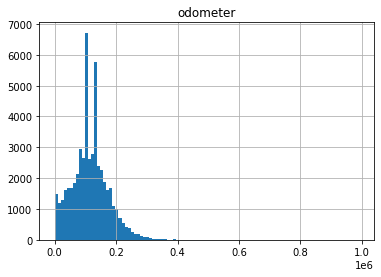

In [100]:
# 'odometer' with outliers

data.hist('odometer', bins=100)

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

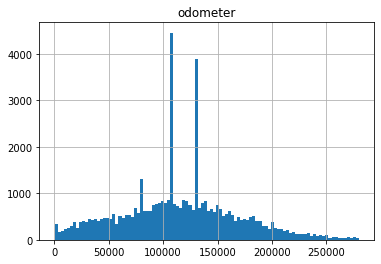

In [101]:
# 'odometer' without outliers

data_clean.hist('odometer', bins=100)

Even after filtering data to 99 percentile, we still can see extremes. Probably, in further analysis, we may go further and use 98-97 percentile, if we understand that these values affect overall data.

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

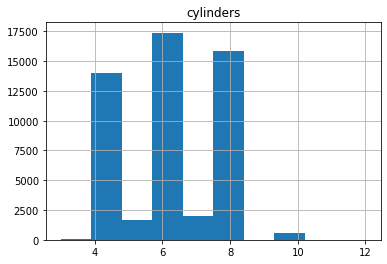

In [102]:
# 'cylinders' with outliers

data.hist('cylinders')

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

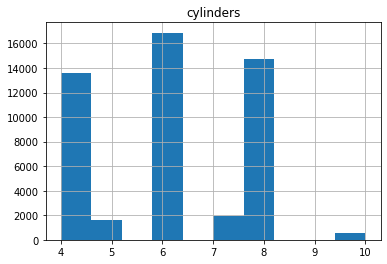

In [103]:
# 'cylinders' without outliers

data_clean.hist('cylinders', bins = 10)

Removing outliers for this tile didn't affect much. 
However, we may see clearly gaps between 5 and 6 and 6,4 and 7. 

array([[<AxesSubplot:title={'center':'condition_category'}>]],
      dtype=object)

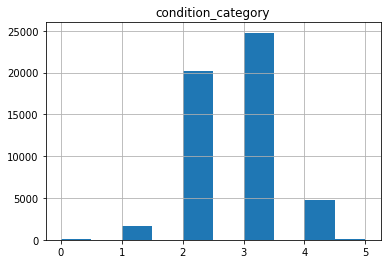

In [104]:
# 'condition_category' with outliers

data.hist('condition_category')

array([[<AxesSubplot:title={'center':'condition_category'}>]],
      dtype=object)

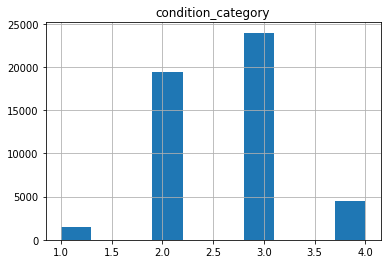

In [105]:
# 'condition_category' without outliers

data_clean.hist('condition_category')

Condition category almost had no outliers.

## Ads lifetime

Let's study how many days advertisements were displayed andescribe the typical lifetime of an ad.

The histogram of: days_listed


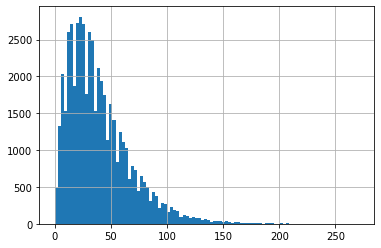

The distribution is skewed to the right
---------------------------------------
Statistics on: days_listed
count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64
---------------------------------------
min border: 3.0
max border: 132.0
---------------------------------------
The outliers are considered to be values below 3.0 and above 132.0
We have 987 values that we can consider outliers


In [106]:
# Study how many days advertisements were displayed

for parameter in ['days_listed']:
    distribution_percentile(parameter)

<AxesSubplot:xlabel='days_listed'>

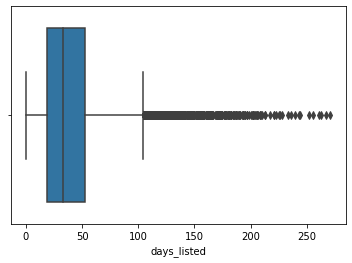

In [107]:
sns.boxplot(x=data_clean['days_listed'])

Most ads exist 12-53 days.

In [108]:
# 'days_listed' mean

data_clean['days_listed'].mean()

39.55397070161912

In [109]:
# 'days_listed' median

data_clean['days_listed'].median()

33.0

array([[<AxesSubplot:title={'center':'too_slow'}>]], dtype=object)

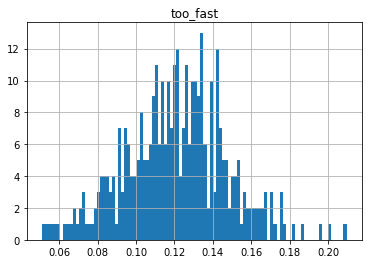

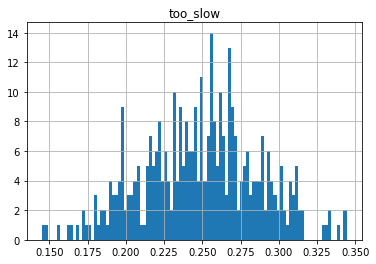

In [110]:
# Let's see when ads were removed quickly and when were listed for an abnormally long time.

data_clean['too_fast'] = data_clean['days_listed'] < 12
too_fast_stat = data_clean.pivot_table(index='date_posted', values='too_fast')
too_fast_stat.hist(bins = 100)

data_clean['too_slow'] = data_clean['days_listed'] > 53
too_slow_stat = data_clean.pivot_table(index='date_posted', values='too_slow')
too_slow_stat.hist(bins = 100)

## Average price per each type of vehicle

In [111]:
# Analyze the number of ads and the average price for each type of vehicle

vehicles=data_clean.groupby(['type'])['price'].agg(['count','mean']).reset_index()
vehicles

,type,count,mean
0,SUV,12039,10904.686851
1,bus,24,17135.666667
2,convertible,367,12788.253406
3,coupe,2060,13831.114563
4,hatchback,991,6827.778002
5,mini-van,1139,8020.540825
6,offroad,194,14218.639175
7,other,240,10790.695833
8,pickup,6648,15846.908093
9,sedan,11790,6961.353435


<AxesSubplot:xlabel='count', ylabel='type'>

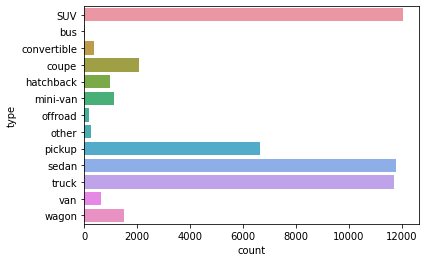

In [112]:
# Plot a graph showing the dependence of the number of ads on the vehicle type

sns.barplot(x=vehicles['count'], y=vehicles['type'])

We can see that ads about SUVs, sedans, trucks, and pickups are published much more frequently than others. At the same time, convertible and offroads are posted rarely.

In [113]:
# Let's see types with the greatest number of ads

prices_by_type=data_clean.groupby(['type'])['price'].nunique().reset_index().sort_values(by='price',ascending=False)
prices_by_type

,type,price
0,SUV,1543
10,truck,1487
9,sedan,1177
8,pickup,955
3,coupe,485
5,mini-van,387
12,wagon,374
4,hatchback,333
11,van,226
2,convertible,188


In [114]:
# Select the two types with the greatest number of ads.

top=list(prices_by_type.head(2)['type'])
top

['SUV', 'truck']

In [115]:
new_data=data_clean[data_clean.type.isin(top)]
new_data['type'].unique()

array(['SUV', 'truck'], dtype=object)

## Price factors

Let's see what factors impact the price most: age, mileage, condition, transmission type, or color.

In [116]:
# Filter data by "SUV" type

suv=new_data[new_data['type']=='SUV']
suv

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,month_posted,weekday_posted,year_posted,vehicle_age,mileage_per_year,condition_category,too_fast,too_slow
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unidentified,...,2018-06-23,19,6,5,2018,7,20714.285714,2,False,False
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,...,2019-01-07,68,1,0,2019,6,18245.500000,3,False,True
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unidentified,...,2018-07-16,19,7,0,2018,6,17362.333333,3,False,False
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,...,2019-02-15,17,2,4,2019,11,13381.000000,3,False,False
14,12990,2009,gmc yukon,excellent,8,gas,132285,automatic,SUV,black,...,2019-01-31,24,1,3,2019,10,13228.500000,3,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012,chevrolet traverse,good,6,gas,144500,automatic,SUV,unidentified,...,2019-03-05,1,3,1,2019,7,20642.857143,2,True,False
51496,4999,2002,toyota 4runner,excellent,6,gas,177901,automatic,SUV,unidentified,...,2018-05-26,59,5,5,2018,16,11118.812500,3,False,True
51500,6995,2012,buick enclave,excellent,6,gas,157000,automatic,SUV,white,...,2018-08-04,17,8,5,2018,6,26166.666667,3,False,False
51502,7995,2011,chevrolet equinox,like new,4,gas,111088,automatic,SUV,unidentified,...,2019-04-01,175,4,0,2019,8,13886.000000,4,False,True


In [117]:
# Let's see whether the 'SUV' price depends on age, mileage or condition.

for_scatter_suv=suv[['price','vehicle_age','condition_category','odometer']]
for_scatter_suv

,price,vehicle_age,condition_category,odometer
0,9400,7,2,145000
7,15990,6,3,109473
8,11500,6,3,104174
9,9200,11,3,147191
14,12990,10,3,132285
...,...,...,...,...
51495,9500,7,2,144500
51496,4999,16,3,177901
51500,6995,6,3,157000
51502,7995,8,4,111088


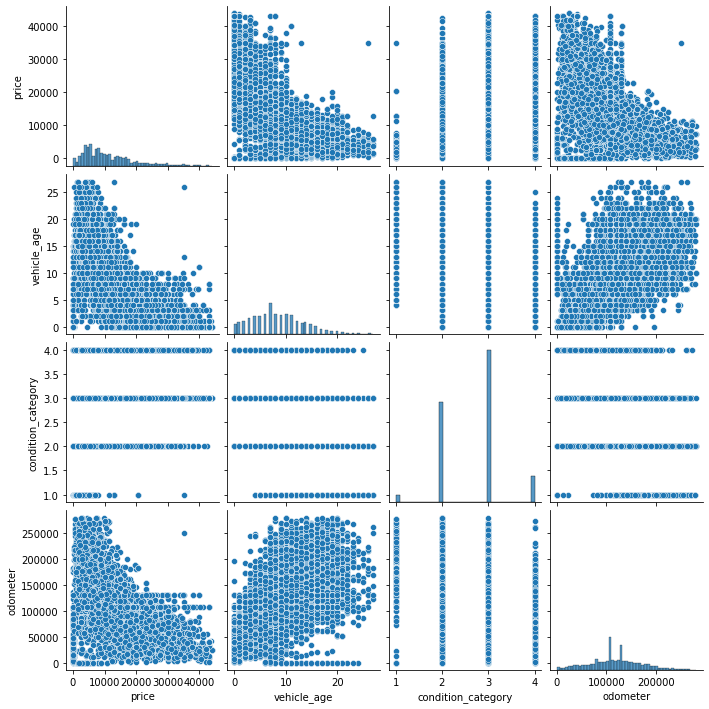

In [118]:
# Let's creatw a scatterplot matrix

sns.pairplot(for_scatter_suv)

In [119]:
# Let's see the correlations of these parameters

for_scatter_suv.corr()

,price,vehicle_age,condition_category,odometer
price,1.000000,-0.584030,0.277810,-0.525361
vehicle_age,-0.584030,1.000000,-0.339309,0.586377
condition_category,0.277810,-0.339309,1.000000,-0.361439
odometer,-0.525361,0.586377,-0.361439,1.000000


There is a definite correlation: the older is the car, the lower is the price. At the same time, the better is the condition, the higher is the price. Also, the less the mileage than higher the price. Also, the bigger the vehicle age, the lower the price.

In [120]:
# Let's see whether the price depends on color.

#Make sure that each category has more than 50 listings

suv['paint_color'].value_counts()

unidentified    2165
black           2138
white           1909
silver          1530
grey            1164
blue            1014
red              884
green            417
brown            352
custom           298
orange            83
yellow            46
purple            39
Name: paint_color, dtype: int64

'yellow' and 'purple' colors have less than 50 ads. It means that these two parameters won't be valid for analysis. 

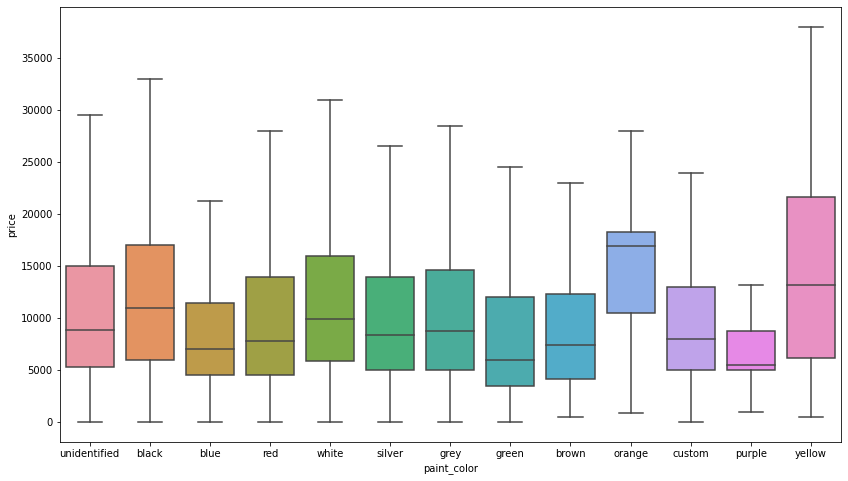

In [121]:
# Let's see the destribution of the prices depending on the color

plt.figure(figsize=(14,8))
ax=sns.boxplot(x="paint_color", y="price", data=suv,showfliers = False)

black and orange cars are more expensive on average than the rest.

In [122]:
# Let's see whether the price depends on transmission type.

#Make sure that each category has more than 50 listings
suv['transmission'].value_counts()

automatic    11403
manual         479
other          157
Name: transmission, dtype: int64

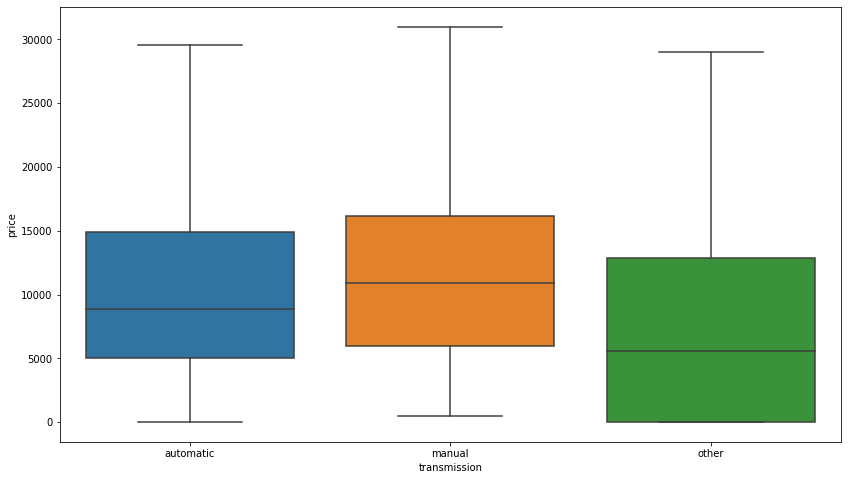

In [123]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=suv,showfliers = False)

Сars with automatic and manual transmission are more expensive than other transmission types.

In [124]:
# Filter data by "truck" type

truck=new_data[new_data['type']=='truck']
truck

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,month_posted,weekday_posted,year_posted,vehicle_age,mileage_per_year,condition_category,too_fast,too_slow
22,7500,2004,chevrolet silverado,like new,8,gas,180000,automatic,truck,red,...,2019-01-05,64,1,5,2019,15,12000.000000,4,False,True
39,8000,2009,ford f-150,good,8,gas,234000,automatic,truck,black,...,2019-03-31,1,3,6,2019,10,23400.000000,2,True,False
50,6200,2006,ford f-150,excellent,6,gas,69698,automatic,truck,custom,...,2018-05-03,50,5,3,2018,12,5808.166667,3,False,False
53,10400,2012,chevrolet colorado,excellent,5,gas,111871,automatic,truck,red,...,2019-01-30,27,1,2,2019,7,15981.571429,3,False,False
60,13000,2005,ram 1500,good,8,gas,146000,automatic,truck,grey,...,2019-03-14,26,3,3,2019,14,10428.571429,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51487,1495,2002,ford f-150,fair,6,gas,15804,manual,truck,white,...,2018-09-18,56,9,1,2018,16,987.750000,1,False,True
51488,21900,2011,chevrolet silverado,excellent,8,diesel,203000,automatic,truck,white,...,2018-12-27,37,12,3,2018,7,29000.000000,3,False,False
51497,2995,2001,ford f-150,good,8,gas,206257,automatic,truck,red,...,2018-12-02,12,12,6,2018,17,12132.764706,2,False,False
51498,15900,2011,gmc sierra,excellent,8,gas,106688,automatic,truck,unidentified,...,2019-01-25,69,1,4,2019,8,13336.000000,3,False,True


In [125]:
# Let's see whether the 'truck' price depends on age, mileage or condition.

for_scatter_truck=truck[['price','vehicle_age','condition_category', 'odometer']]
for_scatter_truck

,price,vehicle_age,condition_category,odometer
22,7500,15,4,180000
39,8000,10,2,234000
50,6200,12,3,69698
53,10400,7,3,111871
60,13000,14,2,146000
...,...,...,...,...
51487,1495,16,1,15804
51488,21900,7,3,203000
51497,2995,17,2,206257
51498,15900,8,3,106688


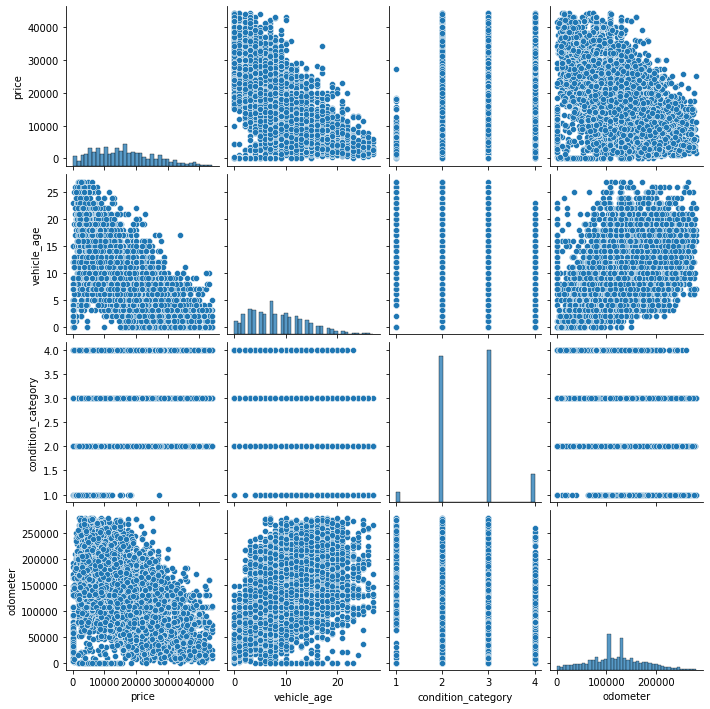

In [126]:
# Let's create a scatterplot matrix

sns.pairplot(for_scatter_truck)

In [127]:
# Let's see the correlations

for_scatter_truck.corr()

,price,vehicle_age,condition_category,odometer
price,1.000000,-0.624813,0.310088,-0.470019
vehicle_age,-0.624813,1.000000,-0.343416,0.518409
condition_category,0.310088,-0.343416,1.000000,-0.326230
odometer,-0.470019,0.518409,-0.326230,1.000000


There is a definite correlation: the older is the car, the lower is the price. At the same time, the better is the condition, the higher is the price. Also, the older is the car, the worse the condition is. Also the less the mileage than higher the price. Also, the higher the vehicle age, the lower the price.

In [128]:
# Let's see the destribution of the prices depending on the color

# Making sure that each category has more than 50 listings
truck['paint_color'].value_counts()

white           3512
unidentified    2032
black           1488
red             1003
silver           962
grey             912
blue             838
custom           309
green            269
brown            233
yellow            66
orange            47
purple            14
Name: paint_color, dtype: int64

'orange' and 'purple' colors have less than 50 ads. It means that these three parameters won't be valid for analysis. 

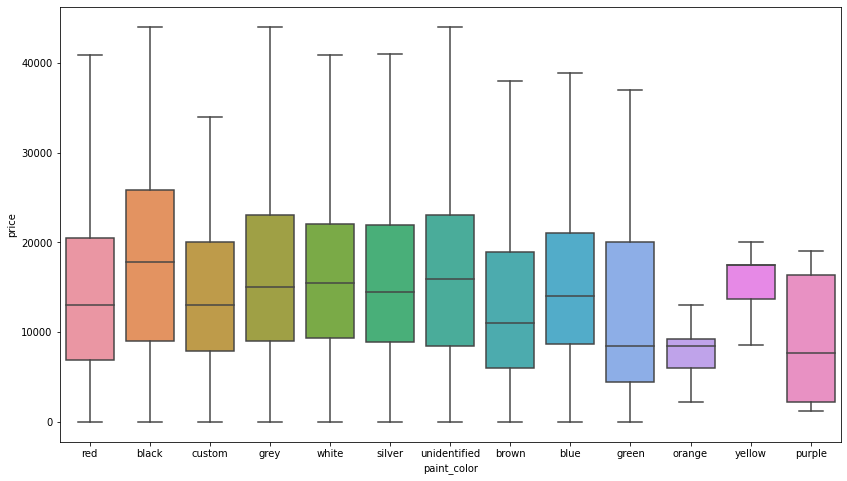

In [129]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="paint_color", y="price", data=truck,showfliers = False)

black and yelow cars are more expensive on average than the rest.

In [130]:
# Let's see the destribution of the prices depending on transmission

#Making sure that each category has more than 50 listings
truck['transmission'].value_counts()

automatic    11088
manual         402
other          195
Name: transmission, dtype: int64

"other" type of transmission has less than 50 ads. It means that this parameter won't be valid for analysis. 

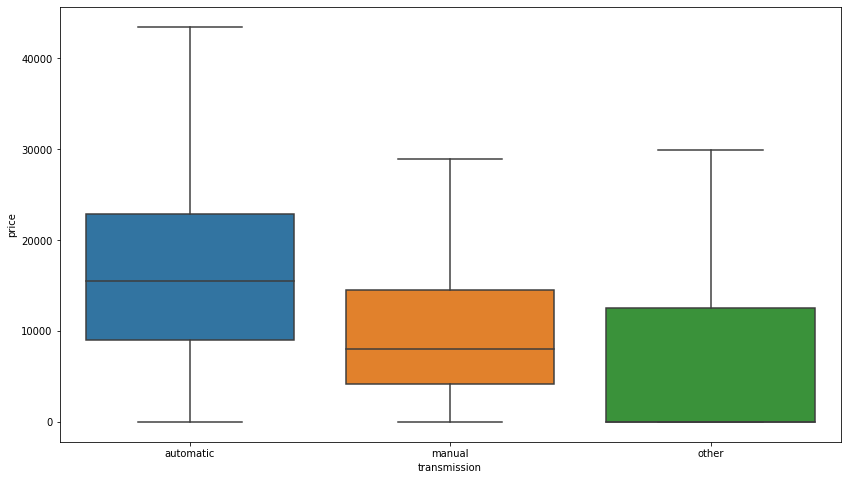

In [131]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=truck,showfliers = False)

Сars with automatic transmission are more expensive than with other types of transmission.

## General conclusion

The **project goal** was to study data of free advertisements for vehicles published on the site and collected over the last few years and determine which factors influence the price of a car.

**Description of the data**

The dataset contains the following fields:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

What we did:

**Step 1. Study data** 

1. Opened the data file
2. Studied the general information

What we figured out:

Columns `price`, `model`, `condition`, `transmission`, `fuel`, `type` and `days_listed` looked normal, but part of the data should be treated to make it more suitable for the required analysis.

- `model_year` and `cylinders` had inappropriate data types. We needed to convert them to int64.
- `date_posted` had object data type. We needed to convert it to DateTime.
-  In `model`, the same models of vehicles were written in different formats. We needed to fix it.
- `is_4wd` - the boolean field that contained only 'True' values (1). We needed to replace missing values with 0s.
-  We also needed to work with missing values in `model_year`, `cylinders`, `odometer`, and `paint_color` columns. We wanted to understand if any factors may have resulted in missing values. Then we needed to choose how to fill in the missing values.

**Step 2. Data preprocessing** 

1. Identified and studied missing values

- We figured out that missing values intersect in a small number of rows, so it can mean that missing values in the dataset are not symmetric.
- We assumed that the missing data in this column is related to other parameters, such as the condition of the vehicle, type of transmission, or type of vehicle. 

If other factors influenced the missing data?

- `condition` distribution of the whole dataset is the same as the `condition` distribution of the missing values. So we can say that there is no connection between missing values in `model_year` and `condition`.
- `transmission` distribution of the whole dataset is the same as the `transmission` distribution of the missing values. So we can say that there is no connection between missing values in `model_year` and `transmission`.
- `type` distribution of the whole dataset is the same as the `type` distribution of the missing values. So we can say that there is no connection between missing values in `model_year` and `type`. 

So there was no special connection between `model_year` and other car parameters. So probably values are missing randomly. Most likely, the missing data in `model_year` is just a technical error. 

We also assumed that missing data in column `cylinders` are related to other parameters, such as type of fuel, the condition of the vehicle, type of transmission, or type of vehicle. 

If other factors influenced the missing data?

- `fuel` distribution of the whole dataset is the same as the `fuel` distribution of the missing values. So we can say that there is no connection between missing values in `cylinders` and `fuel`. 
- `transmission` distribution of the whole dataset is the same as the `transmission` distribution of the missing values. So we can say that there is no connection between missing values in `cylinders` and `transmission`. 
- `type` distribution of the whole dataset is the same as the `type` distribution of the missing values. So we can say that there is no connection between missing values in `cylinders` and `type`. 

So there was no special connection between `cylinders` and other car parameters. So probably values are missing randomly. Most likely, the missing data in `cylinders` is just a technical error. 

Then we assumed that missing values in this column were related to other parameters, such as type of fuel, the condition of the vehicle, or type of vehicle. 

If other factors influenced the missing data?

- There is no special connection between the `odometer` and other car parameters. So probably values are missing randomly. Most likely, the missing data in the `odometer` is just a technical error. They can be replaced by an average `odometer` by the car's condition.

Also, we tried to understand what factors can influence the color of the car. We realized that It is not logical to replace missing data in `paint_color` according to the type or condition of the car. Based on this, we decided to fill the missing data with the value "unidentified".

2. Describe the factors that may have resulted in missing values and fill missing values

- Missing data in `cylinders` was replaced by an average `cylinders` by type of car.
- Missing values in `model_year` were replaced by an average model_year by the car's condition.
- Missing values in `odometer` were replaced by an average odometer by the car's condition.
- `is_4wd`: we assumed that most likely 1 means the presence of 4wd in the car, and 0, respectively, its absence. We know that most often, 4wdis are present in jeeps and not in sedans. To find out if the missing data should be 0, we checked how often the missing data in the is_4wd column occurs in rows where the vehicle type is the sedan. And vice versa, how often we can see "1" in the type of transport like trucks and SUVs. So we were right. The missing data in the is_4wd column mainly occurs in rows where the vehicle type is sedan and "1" in trucks and SUVs. So we filled all the missing data in the column with 0.
- Missing values in `odometer` was `paint_color` filled with the value "unidentified".

3. Indicate the columns where the data types need to be changed and convert the data to the required types

There are inappropriate data types in some columns. `model_year` and `cylinders` were float64, and we converted them to int64. `date_posted` objected, and we converted it to DateTime.

We also replaced extra values in the `model.`

**Step 3. Enrich data** 

We calculated and added to the table the following:

- Day of the week, month, and year the ad was placed
- The vehicle's age (in years) when the ad was placed
- The vehicle's average mileage per year
- In the `condition` column, replaced string values with a numeric scale

**Step 4. Carry out exploratory data analysis** 

1. Studied the outliers of price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition

We figured out that columns `price`, `vehicle_age`, and `odometer` contain outliers. This makes it difficult to study the big part of the data when visualized in histograms.

2. Removed the outliers and stored them in a separate DataFrame
3. Used the filtered data to plot new histograms and draw conclusions

- After removing outliers, the graph `price` became more readable, and we can see distribution more accurately.
- With the change of scale (after removing extreme values), we saw in `vehicle_age` that the biggest number of vehicles is distributed around 4 to 10 years, with a spike in ~6 years.
- Even after filtering data in `odometer` to 99 percentile, we still can see extremes. 
- Removing outliers for `cylinders` didn't affect much. However, we may see gaps between 5 and 6 and 6,4, and 7. 
- `condition_category` almost had no outliers.

4. Study how many days advertisements were displayed

We figure out that most ads exist for 12-53 days.

5. Analyze the number of ads and the average price for each type of vehicle

Ads about SUVs, sedans, trucks, and pickups are published more frequently than others. At the same time, convertible and offroads are posted rarely.

6. Analyze what factors impact the price most

We found definite correlations in the price of the SUVs and other parameters: the older is the car, the lower is the price. At the same time, the better is the condition, the higher is the price. Also, the less the mileage than higher the price. Also, we figured out that black and orange SUVs are more expensive on average than the rest. Also, cars with automatic and manual transmission are more expensive than other transmission types.

We also found definite correlations in the price of the tracks and other parameters: the older is the car, the lower is the price. At the same time, the better its condition, the higher is the price. Also, the older is the car, the worse the condition is. Also, the less the mileage than higher the price. Also, we figured out that black and yellow tracks are more expensive on average than the rest. Сars with automatic transmission are more expensive than with other types of transmission. 

**Overall conclusion**

Three factors influence car price: its age, condition, color, mileage, and transmission.
